# Test on period_2_way
##### marginally better precision

In [1]:
from __init__ import *

In [2]:
consecutive = 12
n_candles_as_x = 5
take_profit_pips = -20 
stop_loss_pips = 20

# print(granularity_key, start, end, instrument, consecutive)

In [3]:
TRAINING_DATA_FOLDER = 'training_data/'
COMPILED_FOLDER = TRAINING_DATA_FOLDER + 'compiled/'
filename = '28_instruments_20210301000000_to_20210601000000_20211025165327.csv'
df = pd.read_csv(COMPILED_FOLDER + filename)
del df['Unnamed: 0']

In [4]:
mine = Mine_v2(df, consecutive, n_candles_as_x, take_profit_pips, stop_loss_pips)

#--------- feature extraction ---------#
mine.extract_body_height()
mine.extract_upper_wick_height()
mine.extract_lower_wick_height()
mine.extract_all_increments_to_i_candle()

#------- label processing -------#
mine.extract_high_score(type='multiplier')
mine.extract_close_score(close_score_pips=10, close_type='ceiling')
mine.extract_low_score(type='increment')
mine.extract_compound_score(
        increment_label='low_score',
        multipler_label='high_score'
)

#-------- clean up -------#
mine.drop_intermediate_headers()
mine.drop_original_headers()

other_headers = ['body_height', 'upper_wick', 'lower_wick']
other_headers = [header+str(n) for n in range(n_candles_as_x, consecutive) for header in other_headers]
mine.drop_headers(other_headers)

#----------#
df = mine.df
# mine.df

In [5]:
df

body_height0  body_height1  body_height2  body_height3  body_height4  \
0            0.00044      -0.00033       0.00034       0.00028       0.00010   
1           -0.00033       0.00034       0.00028       0.00010       0.00009   
2            0.00034       0.00028       0.00010       0.00009       0.00028   
3            0.00028       0.00010       0.00009       0.00028       0.00017   
4            0.00010       0.00009       0.00028       0.00017      -0.00002   
...              ...           ...           ...           ...           ...   
123170      -0.00010       0.00030       0.00008       0.00009       0.00012   
123171       0.00030       0.00008       0.00009       0.00012       0.00006   
123172       0.00008       0.00009       0.00012       0.00006       0.00016   
123173       0.00009       0.00012       0.00006       0.00016       0.00007   
123174       0.00012       0.00006       0.00016       0.00007       0.00005   

        upper_wick0  upper_wick1  upper_wick2  upper_wick3  upper_wick4  \
0           0.00011     -0.00008      0.00008      0.00003      0.00002   
1          -0.00008      0.00008      0.00003      0.00002      0.00010   
2           0.00008      0.00003      0.00002      0.00010      0.00006   
3           0.00003      0.00002      0.00010      0.00006      0.00024   
4           0.00002      0.00010      0.00006      0.00024     -0.00003   
...             ...          ...          ...          ...          ...   
123170     -0.00008      0.00008      0.00005      0.00010      0.00006   
123171      0.00008      0.00005      0.00010      0.00006      0.00014   
123172      0.00005      0.00010      0.00006      0.00014      0.00015   
123173      0.00010      0.00006      0.00014      0.00015      0.00009   
123174      0.00006      0.00014      0.00015      0.00009      0.00009   

        lower_wick0  lower_wick1  lower_wick2  lower_wick3  lower_wick4  \
0           0.00000     -0.00010      0.00002      0.00004      0.00029   
1          -0.00010      0.00002      0.00004      0.00029      0.00011   
2           0.00002      0.00004      0.00029      0.00011      0.00014   
3           0.00004      0.00029      0.00011      0.00014      0.00003   
4           0.00029      0.00011      0.00014      0.00003     -0.00061   
...             ...          ...          ...          ...          ...   
123170     -0.00007      0.00007      0.00008      0.00004      0.00006   
123171      0.00007      0.00008      0.00004      0.00006      0.00004   
123172      0.00008      0.00004      0.00006      0.00004      0.00006   
123173      0.00004      0.00006      0.00004      0.00006      0.00004   
123174      0.00006      0.00004      0.00006      0.00004      0.00005   

        increment_to_4_from0  increment_to_4_from1  increment_to_4_from2  \
0                   -0.00038              -0.00070              -0.00038   
1                   -0.00076              -0.00044              -0.00016   
2                   -0.00070              -0.00042              -0.00032   
3                   -0.00058              -0.00048              -0.00042   
4                   -0.00047              -0.00041              -0.00015   
...                      ...                   ...                   ...   
123170              -0.00054              -0.00024              -0.00016   
123171              -0.00030              -0.00022              -0.00015   
123172              -0.00036              -0.00029              -0.00020   
123173              -0.00038              -0.00029              -0.00023   
123174              -0.00034              -0.00028              -0.00014   

        increment_to_4_from3     y  
0                   -0.00010  0.50  
1                   -0.00006  0.55  
2                   -0.00026  0.60  
3                   -0.00016  0.65  
4                    0.00001  0.70  
...                      ...   ...  
123170              -0.00009  0.50  
123171              -0.00006  0.50  

In [6]:
n_inputs = 19
model_path = '../../models/20211025235418_positive_non_bin_v2_epoch_100'
model_class = non_bin_v2
y_value = 0.7

predictor = Prophet.load_model(model_class, model_path, n_inputs)

df['prediction_prob_positive'] = df.apply(predictor.apply_predictions_to_df, axis=1)
df['prediction_prob_positive'] = df['prediction_prob_positive'].apply(lambda x: x[1])

In [8]:
n_inputs = 19
model_path = '../../models/20211026082249_negative_non_bin_v2_epoch_100'
model_class = non_bin_v2
y_value = 0.7

predictor = Prophet.load_model(model_class, model_path, n_inputs)

df['prediction_prob_negative'] = df.apply(predictor.apply_predictions_to_df, axis=1)
df['prediction_prob_negative'] = df['prediction_prob_negative'].apply(lambda x: x[1])

In [12]:
negative_threshold = 0.54
positive_threshold = 0.6

df['prediction_negative'] = df['prediction_prob_negative'].apply(lambda x: 1 if x > negative_threshold else 0)
df['prediction_positive'] = df['prediction_prob_positive'].apply(lambda x: 1 if x > positive_threshold else 0)

In [28]:
# false_positives = df[(df['prediction_prob_negative'] > negative_threshold) & (df['y'] < y_value)]
# mean_positive_score = false_positives['prediction_prob_positive'].mean()
# max_positive_score = max(false_positives['prediction_prob_positive'])
# print('mean = {}'.format(mean_positive_score))
# print('max = {}'.format(max_positive_score))
# false_positives[['prediction_prob_positive', 'y']]

mean = 0.17401638554166193
max = 0.5248690247535706


prediction_prob_positive       y
1224                    0.015796  0.5400
1443                    0.210508  0.5000
2598                    0.510105  0.6000
2600                    0.313413  0.5000
3422                    0.154875  0.4500
5825                    0.079957  0.4500
15618                   0.202650  0.2000
16261                   0.198469  0.3600
16346                   0.190555  0.3600
23714                   0.175163  0.5500
24385                   0.047450  0.0000
24388                   0.205213  0.2520
26786                   0.127872  0.1080
28821                   0.191491  0.6000
28906                   0.186077  0.3500
28991                   0.136399  0.1512
30453                   0.056507  0.4000
30963                   0.138604  0.0720
31310                   0.212515  0.0000
31341                   0.191184  0.6500
31377                   0.023877  0.5000
37646                   0.211406  0.6000
44303                   0.210742  0.4050
51169                   0.216552  0.3000
52003                   0.145122  0.5500
58788                   0.196141  0.6000
69920                   0.524869  0.5000
77871                   0.193503  0.2520
78176                   0.132175  0.5000
78261                   0.202908  0.5000
78431                   0.192577  0.5000
81680                   0.198454  0.6000
82520                   0.034913  0.5500
86262                   0.106775  0.5500
86377                   0.108169  0.5000
86771                   0.235092  0.5000
87112                   0.020786  0.6000
87227                   0.055230  0.5500
87282                   0.127055  0.6500
90937                   0.194145  0.6500
91691                   0.173177  0.6000
91776                   0.182408  0.6000
91941                   0.235771  0.4500
92026                   0.225905  0.5000
105989                  0.175470  0.2800
117711                  0.136727  0.6500

In [49]:
thresholds, means, precisions, recalls, variances = [], [], [], [], []
tps = []

for i in range(0, 100, 1):
    yang_threshold = i/100
    thresholds.append(yang_threshold)
    if i%5 ==0:
        print('Running threshold = {}'.format(yang_threshold))
    
    # test variables
    test_threshold = 0.54
    y_value = 0.7

    # precision
    positive_df = df[(df['prediction_prob_negative'] > test_threshold) & (df['prediction_prob_positive'] < yang_threshold)]
    n_positive = len(positive_df)
    tp_df = positive_df[positive_df['y'] >= y_value]
    n_tp = len(tp_df)
    precision = 0
    if n_positive != 0:
        precision = (n_tp/n_positive)
    tps.append(n_tp)
    precisions.append(precision)
#     print('Precision: {}/{} = {:.2f}%'.format(n_tp, n_positive, (n_tp/n_positive)*100))

    # recall
    real_positive_df = df[df['y'] >= y_value]
    n_real_positive = len(real_positive_df)                      
    tp_df = real_positive_df[(real_positive_df['prediction_prob_negative'] > test_threshold) & (real_positive_df['prediction_prob_positive'] < yang_threshold)]
    n_tp = len(tp_df)
    recall = (n_tp/n_real_positive)
    recalls.append(recall)
#     print('Recall: {}/{} = {:.2f}%'.format(n_tp, n_real_positive, (n_tp/n_real_positive)*100))

    # mean and variance
    def greater_than_threshold(row):
        return 1 if ((row['prediction_prob_negative'] > test_threshold) & (row['prediction_prob_positive'] < yang_threshold)) else 0

    df['prediction_negative'] = df.apply(greater_than_threshold, axis=1)
    mean = df[(df['prediction_negative'] == 1)]['y'].mean()
    variance = df[(df['prediction_negative'] == 1)]['y'].var()
    means.append(mean)
    variances.append(variance)
#     print('Mean: {:.4f}'.format(mean))
#     print('Variance: {:.4f}'.format(variance))

Running threshold = 0.0
Running threshold = 0.05
Running threshold = 0.1
Running threshold = 0.15
Running threshold = 0.2
Running threshold = 0.25
Running threshold = 0.3
Running threshold = 0.35
Running threshold = 0.4
Running threshold = 0.45
Running threshold = 0.5
Running threshold = 0.55
Running threshold = 0.6
Running threshold = 0.65
Running threshold = 0.7
Running threshold = 0.75
Running threshold = 0.8
Running threshold = 0.85
Running threshold = 0.9
Running threshold = 0.95


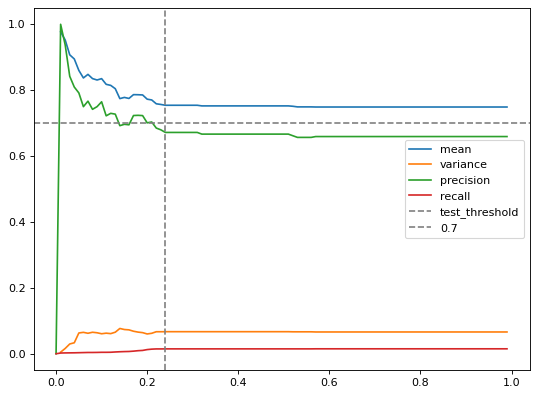

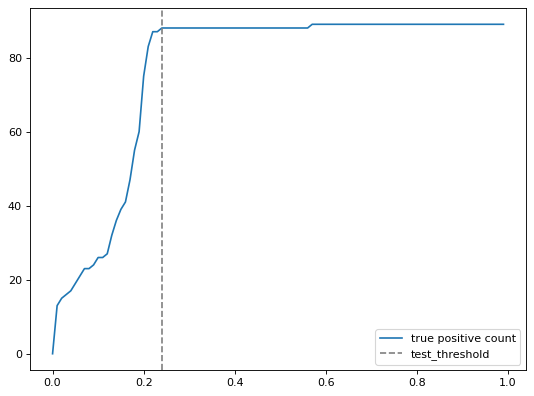

In [56]:
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=80)

yang_threshold = 0.24
y_value = 0.7

labels = ['mean', 'variance', 'precision', 'recall']
content = [means, variances, precisions, recalls]
for c, l in zip(content, labels):
    plt.plot(thresholds, c, label=l)
plt.axvline(x=yang_threshold, c='gray', linestyle='--', label='test_threshold')
plt.axhline(y=y_value, c='gray', linestyle='--', label=y_value)
plt.legend()
plt.show()

figure(figsize=(8, 6), dpi=80)
labels = ['true positive count']
content = [tps]
for c, l in zip(content, labels):
    plt.plot(thresholds, c, label=l)
plt.axvline(x=yang_threshold, c='gray', linestyle='--', label='test_threshold')
plt.legend()
plt.show()

In [57]:
# test variables
test_threshold = 0.54
yang_threshold = 0.24
y_value = 0.7

# precision
positive_df = df[(df['prediction_prob_negative'] > test_threshold) & (df['prediction_prob_positive'] < yang_threshold)]
n_positive = len(positive_df)
tp_df = positive_df[positive_df['y'] >= y_value]
n_tp = len(tp_df)
precision = 0
if n_positive != 0:
    precision = (n_tp/n_positive)
print('Precision: {}/{} = {:.2f}%'.format(n_tp, n_positive, (n_tp/n_positive)*100))

# recall
real_positive_df = df[df['y'] >= y_value]
n_real_positive = len(real_positive_df)                      
tp_df = real_positive_df[(real_positive_df['prediction_prob_negative'] > test_threshold) & (real_positive_df['prediction_prob_positive'] < yang_threshold)]
n_tp = len(tp_df)
recall = (n_tp/n_real_positive)
print('Recall: {}/{} = {:.2f}%'.format(n_tp, n_real_positive, (n_tp/n_real_positive)*100))

# mean and variance
def greater_than_threshold(row):
    return 1 if ((row['prediction_prob_negative'] > test_threshold) & (row['prediction_prob_positive'] < yang_threshold)) else 0

df['prediction_negative'] = df.apply(greater_than_threshold, axis=1)
mean = df[(df['prediction_negative'] == 1)]['y'].mean()
variance = df[(df['prediction_negative'] == 1)]['y'].var()
print('Mean: {:.4f}'.format(mean))
print('Variance: {:.4f}'.format(variance))

Precision: 88/131 = 67.18%
Recall: 88/5938 = 1.48%
Mean: 0.7542
Variance: 0.0670


In [58]:
# test variables
test_threshold = 0.54
yang_threshold = 1
y_value = 0.7

# precision
positive_df = df[(df['prediction_prob_negative'] > test_threshold) & (df['prediction_prob_positive'] < yang_threshold)]
n_positive = len(positive_df)
tp_df = positive_df[positive_df['y'] >= y_value]
n_tp = len(tp_df)
precision = 0
if n_positive != 0:
    precision = (n_tp/n_positive)
print('Precision: {}/{} = {:.2f}%'.format(n_tp, n_positive, (n_tp/n_positive)*100))

# recall
real_positive_df = df[df['y'] >= y_value]
n_real_positive = len(real_positive_df)                      
tp_df = real_positive_df[(real_positive_df['prediction_prob_negative'] > test_threshold) & (real_positive_df['prediction_prob_positive'] < yang_threshold)]
n_tp = len(tp_df)
recall = (n_tp/n_real_positive)
print('Recall: {}/{} = {:.2f}%'.format(n_tp, n_real_positive, (n_tp/n_real_positive)*100))

# mean and variance
def greater_than_threshold(row):
    return 1 if ((row['prediction_prob_negative'] > test_threshold) & (row['prediction_prob_positive'] < yang_threshold)) else 0

df['prediction_negative'] = df.apply(greater_than_threshold, axis=1)
mean = df[(df['prediction_negative'] == 1)]['y'].mean()
variance = df[(df['prediction_negative'] == 1)]['y'].var()
print('Mean: {:.4f}'.format(mean))
print('Variance: {:.4f}'.format(variance))

Precision: 89/135 = 65.93%
Recall: 89/5938 = 1.50%
Mean: 0.7489
Variance: 0.0661
